## Problem Definition

This dataset was retrieved from Kaggle's public datasets (https://www.kaggle.com/payal292/starter-health-insurance-data-d431991e-2) and describes characteristics of members of a health insurance plan. We are performing a detailed exploratory data analysis (EDA) to make better sense of the data. EDA is the process of figuring out what the data can tell us and can be used to find patterns, relationships, or anomalies to inform our subsequent analysis. There are endless ways to perform EDA, and we will explore some of them using the seaborn visualization library. 

## Installing the Libraries

The first step is to install the necessary libraries for performing EDA. Numpy will be used for linear algebra, pandas for data processing and seaborn for data visualizations. Input data files are available in the "input" directory.

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
print(os.listdir("input"))

['insurance.csv']


## Importing the Dataset

The next step is to import the dataset and check its shape, i.e. the number of rows and columns. 

In [4]:
data = pd.read_csv('input/insurance.csv')
print(data.shape)

(1338, 7)


There are 1338 rows or members, and 7 columns or features. 

## Exploratory Data Analysis

Now we begin looking at the data in more detail. First, we will look at the different data types.  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


We have integers, floats and objects, and luckily no null values. Next, we take a look at the summary statstics for the dataset. 


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


It looks like everything is within acceptable ranges. For example, age is between 18 and 64, which makes sense given that this is a dataset of adults on a commercial insurance plan. Next, we check the head (top 5 rows) of the dataset.

No inconsistencies are identified. Let's move on to create a pairs plot. This plots pairwise relationships in a dataset, and is a great method to identify trends for follow-up analysis. By default, this function will create a grid of axes such that each variable in our dataset will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column. Fortunately seaborn gives us an easy way to implement the pairs plot. [1]

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Figure size 1296x576 with 0 Axes>

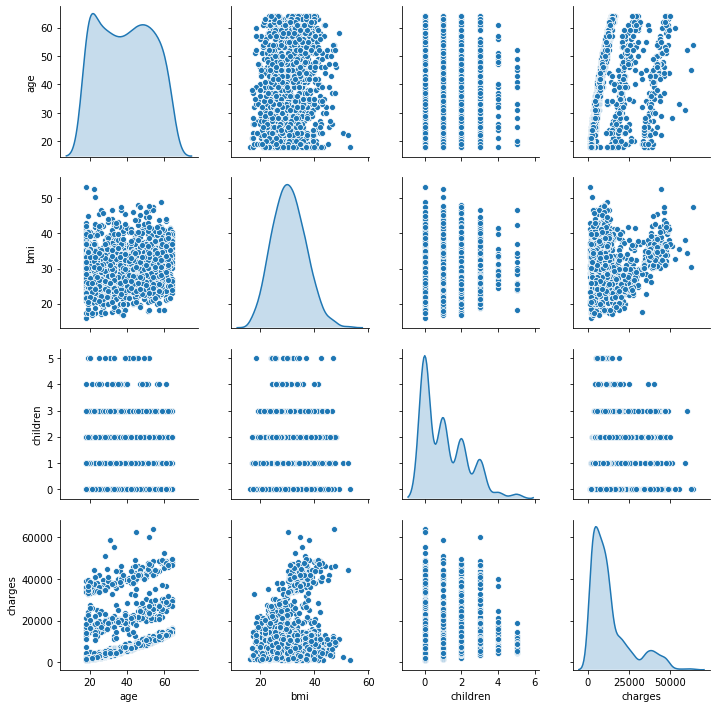

In [7]:
plt.figure(figsize = (18, 8))
sns.pairplot(data=data, diag_kind = 'kde')

Based on these patterns, age seems to be an interesting feature to start our exploration with. Let's visualize the ages of the members. We will add a Kernel Density Estimator (KDE) to our histogram. The KDE is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. [2]

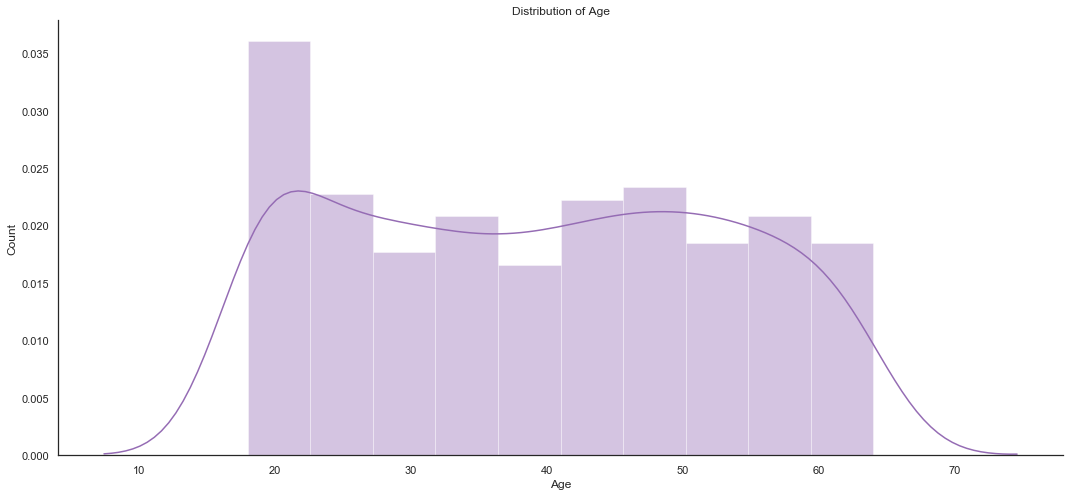

In [8]:
plt.figure(figsize = (18, 8))
sns.set(style="white", palette="muted", color_codes=True)
plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(data['age'], bins = 10, color = 'm', kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
sns.despine()
plt.show()

Lets also create a scatter plot to check the relationship between age and charges using a scatter plot as well as a bar graph.

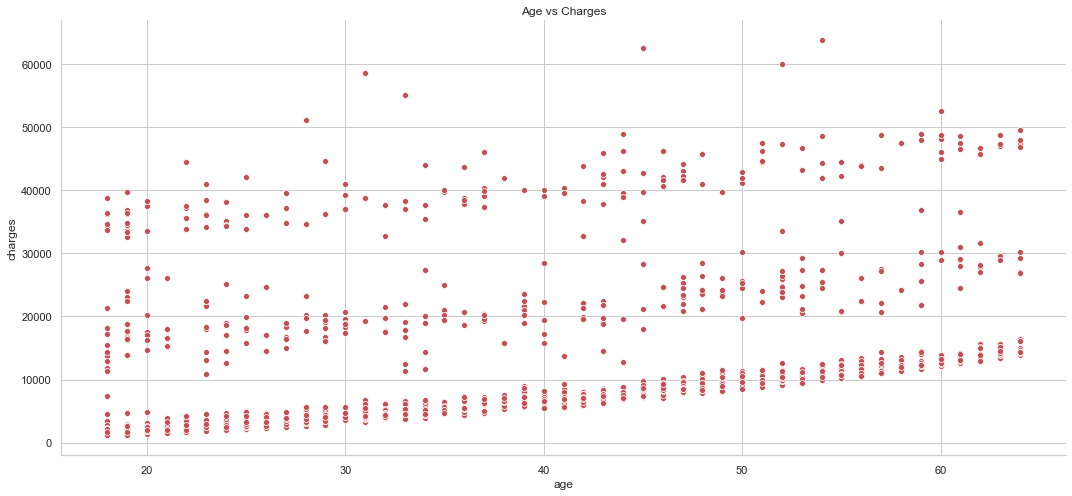

In [9]:
plt.figure(figsize = (18, 8))
sns.set(style="whitegrid")
sns.scatterplot(x= data['age'] , y= data['charges'], color = 'r')
plt.title("Age vs Charges")
sns.despine()

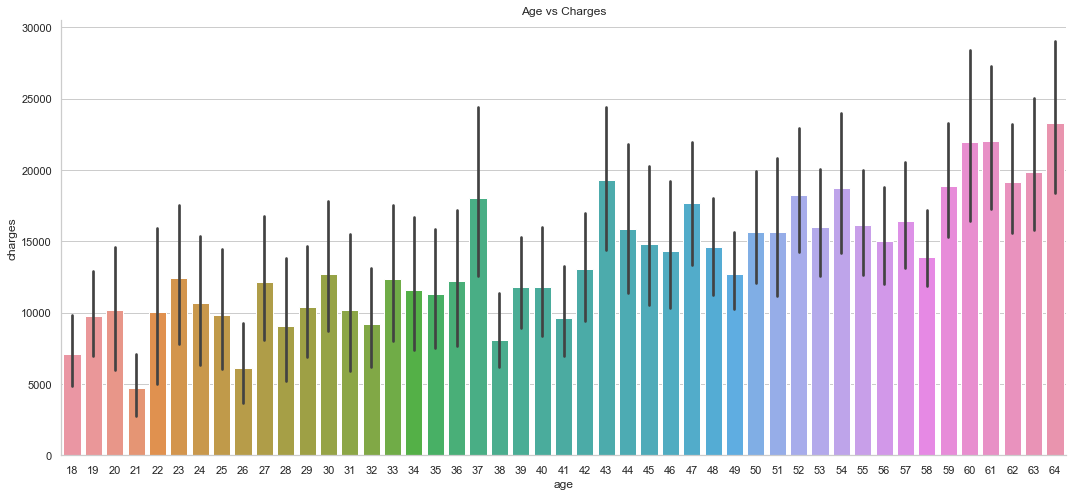

In [10]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'age', y = 'charges', data = data)
plt.title("Age vs Charges")
sns.despine()

As expected, charges go up with age. We see from the scatterplot that there are 3 distinct cohorts of members that can be described as low-cost, medium-cost and high-cost members. We can also see from the bar grapht that at certain ages, the charges spike, like at age 22 and 27. We hypothesize that at 22 many people get their first job and consequently their first insurance plan, and at 27 those who remained on their parents plan were forced to buy their own, since the ACA allows children to be on their parents' plans until age 26. 

On that note, it might be interesting to look at the relationship between a member's number of children and charges. First let's look at the distribution of the number of children using a countplot, which simply shows the counts of the observations in each category (in this case, number of children), using bars. Then, we will use box and whisker plots to show distributions with respect to each category. A box and whisker plot is a standardized way of displaying the datset based on a five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.

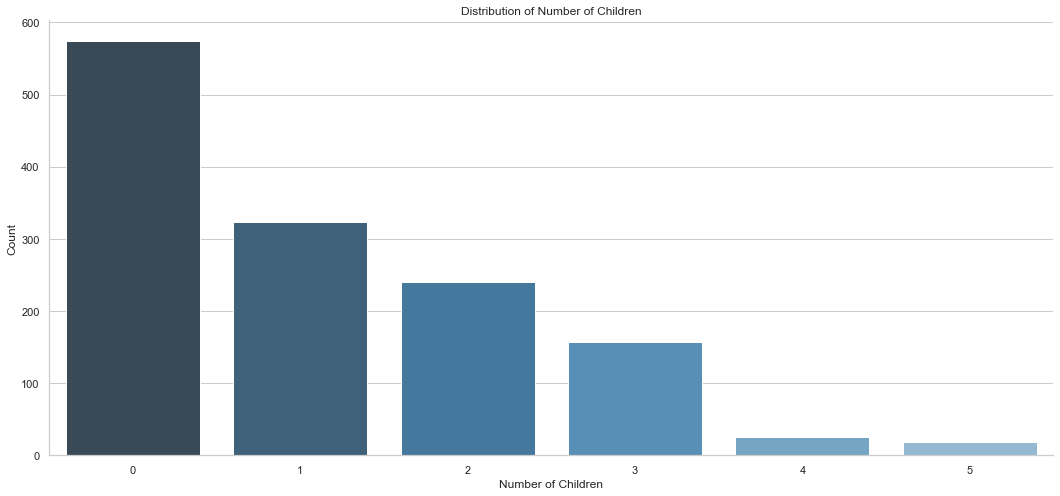

In [11]:
plt.figure(figsize = (18, 8))
sns.countplot(data['children'], palette = 'Blues_d').set_title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
sns.despine()
plt.show()

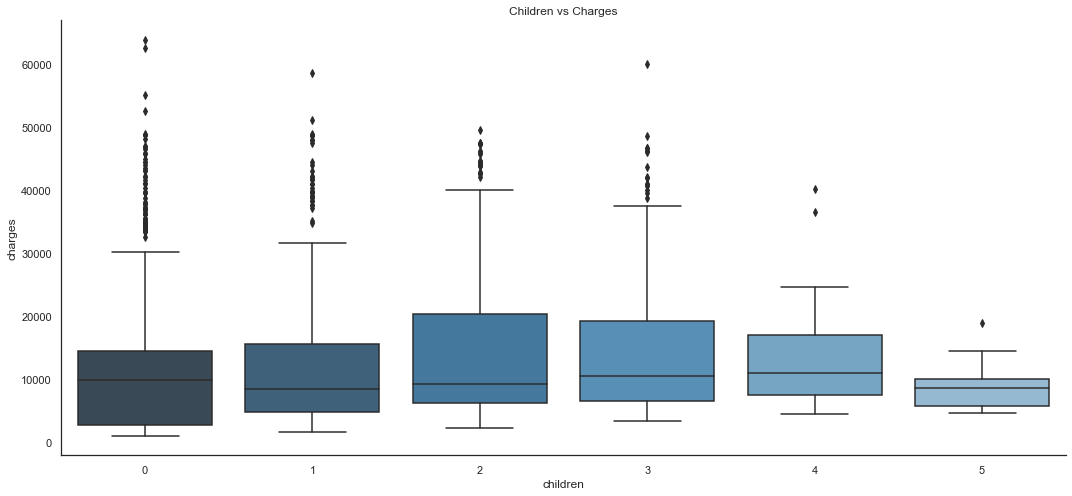

In [12]:
sns.set_style("white")
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'children', y = 'charges', data = data, palette ='Blues_d')
plt.title('Children vs Charges')
sns.despine()

The number of children a member has an interesting impact on charges based on this plot: those with 2 or 3 kids have slightly higher charges than those with 0-1 or 4-5 kids. Next, lets take a look at gender using a pie chart. 

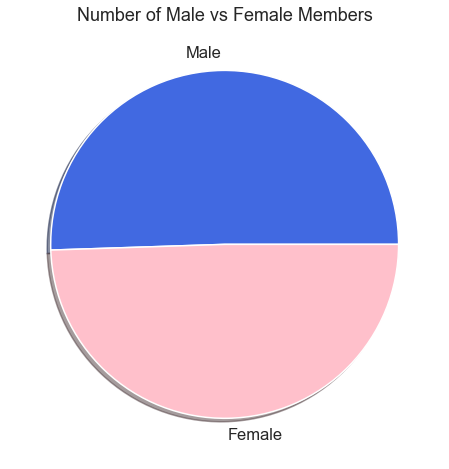

In [13]:
colors = ['royalblue', 'pink']
labels = "Male", "Female"
size = (data['sex'].value_counts())
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, data = data, colors = colors, labels = labels, shadow = True)
plt.title('Number of Male vs Female Members')
plt.show()

There are about the same number of males and females in this dataset. Lets see how gender affects charges using a violin plot. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high. [3]

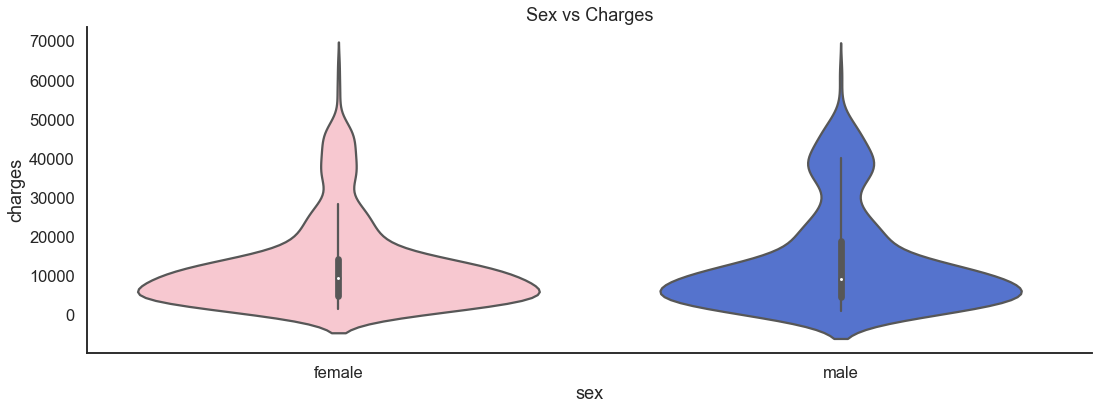

In [12]:
sns.set_style("white")
colors = ['pink', 'royalblue']
plt.figure(figsize = (18, 6))
sns.violinplot(x = 'sex', y = 'charges', data = data, palette = colors, orient = 'v')
plt.title('Sex vs Charges')
sns.despine()

From the upper end of the violin plot we see that in general, males have a greater number of high cost charges than females. It would be interesting to see how these charges depend on age as well. We'll use a basic scatter plot, but color the points based on sex. 

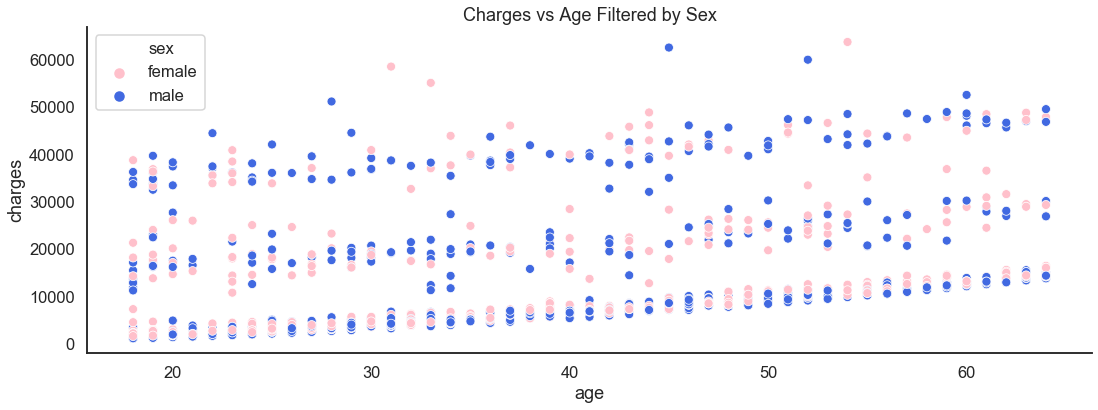

In [10]:
sns.set_context('talk')
sns.set_style("white")
plt.figure(figsize = (18, 6))
colors = ['pink', 'royalblue']
sns.scatterplot(x='age' , y='charges', hue='sex', palette = colors, data=data).set_title('Charges vs Age Filtered by Sex')
sns.despine()


While it is difficult to see any significant relationship here, we can perform a similar analysis but this time filtering for smoking status. First lets see how many members smoke.

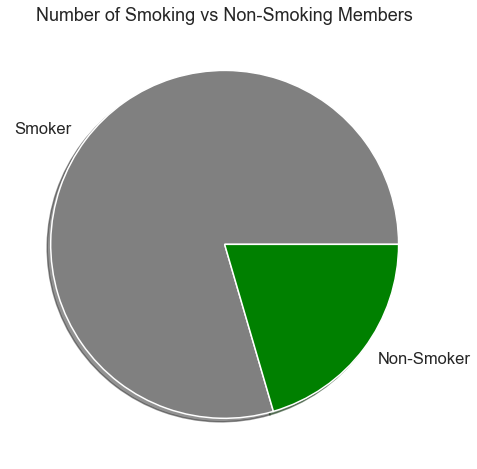

In [14]:
colors = ['gray', 'green']
labels = "Smoker", "Non-Smoker"
size = (data['smoker'].value_counts())
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True)
plt.title('Number of Smoking vs Non-Smoking Members')
plt.show()

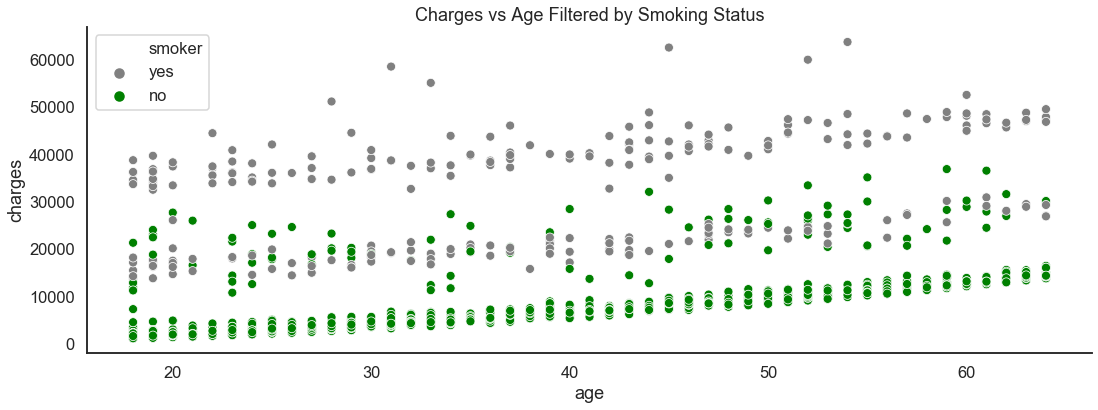

In [15]:
colors = ['gray', 'green']
plt.figure(figsize = (18, 6))
sns.scatterplot(x= 'age' , y= 'charges', hue='smoker', palette = colors, data=data).set_title('Charges vs Age Filtered by Smoking Status')
sns.despine()

Perhaps unsurprisingly, smokers consistently seem to have higher charges on average than non-smokers, independent of age. Let's see how BMI plays into this. 

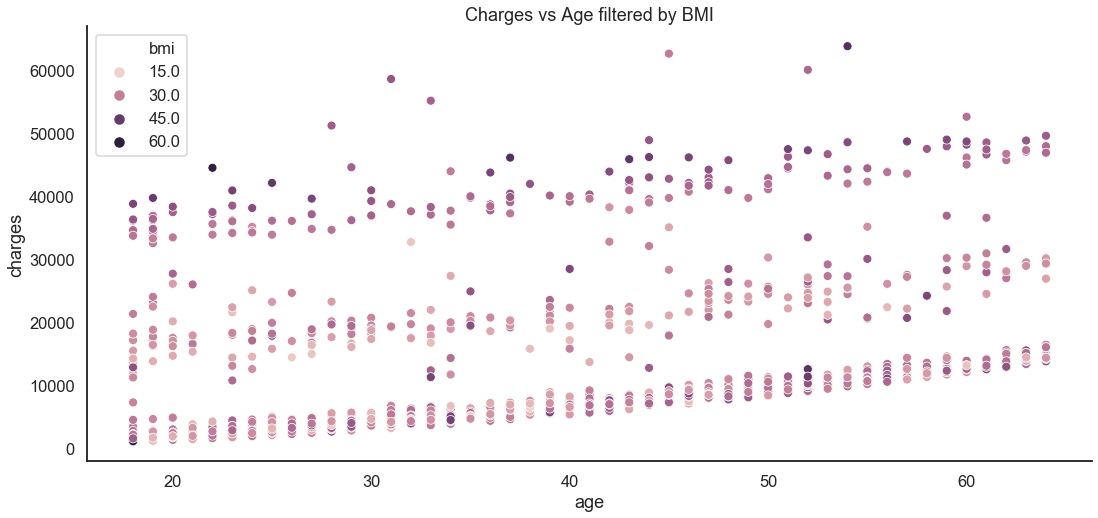

In [16]:
sns.set_context('talk')
plt.figure(figsize = (18, 8))
sns.scatterplot(x= 'age' , y= 'charges', hue = 'bmi', data=data).set_title('Charges vs Age filtered by BMI')
sns.despine()

Members with higher BMIs, on average experience higher charges, again independent of age. Now that we have explored the relationship between BMI and charges, and smoking and charges, we are curious about the combined impact of having a high BMI AND smoking. First, let's define a new categorical variable: "BMI_smoker". We will define "high BMI" to be >= 30 and take a look at the head of this dataset including this newly created variable.

In [19]:
data['BMI_smoker'] = 'default'
data.loc[(data.bmi >= 30) & (data.smoker == 'yes'), 'BMI_smoker'] = 'High_BMI_smoker'
data.loc[(data.bmi >= 30) & (data.smoker == 'no'), 'BMI_smoker'] = 'High_BMI_no_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'yes'), 'BMI_smoker'] = 'Normal_BMI_smoker'
data.loc[(data.bmi < 30) & (data.smoker == 'no'), 'BMI_smoker'] = 'Normal_BMI_no_smoker'
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,Normal_BMI_smoker
1,18,male,33.770,1,no,southeast,1725.55230,High_BMI_no_smoker
2,28,male,33.000,3,no,southeast,4449.46200,High_BMI_no_smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal_BMI_no_smoker
4,32,male,28.880,0,no,northwest,3866.85520,Normal_BMI_no_smoker


Now,similar to our previous analysis, let's look at a scatter plot of charges as age increases, but this time color code the points based upon members' BMI and smoking status.

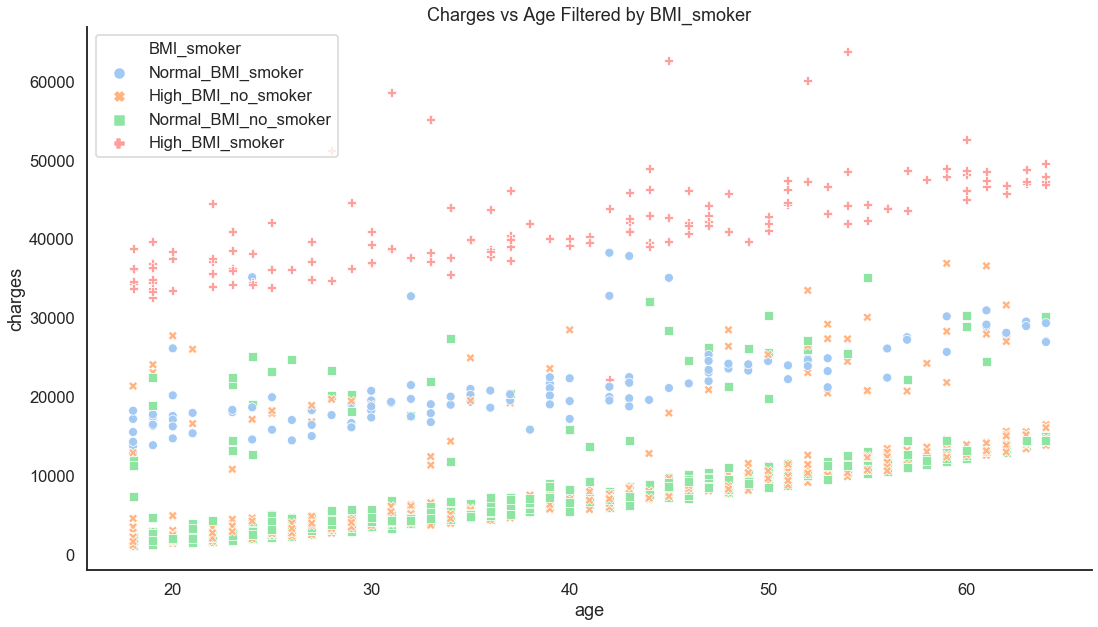

In [20]:
sns.set_context('talk')
plt.figure(figsize = (18, 10))
sns.scatterplot(x= 'age' , y= 'charges', hue='BMI_smoker', palette = 'pastel', data=data, style = 'BMI_smoker').set_title('Charges vs Age Filtered by BMI_smoker')
sns.despine()

Clearly, being a smoker and having a high BMI is highly correlated with having high charges. If you have a high BMI, smoking is especially strongly correlated with you having high insurance claims. And inversely, if you are a smoker, a high BMI is particularly indicative of having high insurance claims.

Next we can visualize the regions to which members belong.

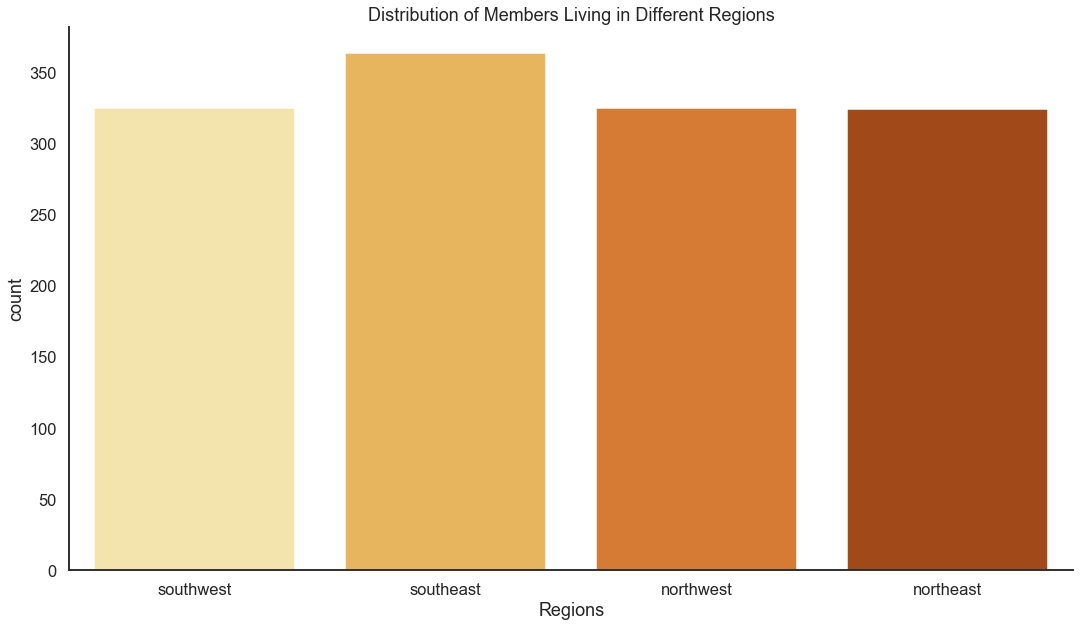

In [21]:
plt.figure(figsize = (18, 10))
sns.countplot(data['region'], palette='YlOrBr').set_title('Distribution of Members Living in Different Regions')
plt.xlabel('Regions')
plt.ylabel('count')
sns.despine()
plt.show()

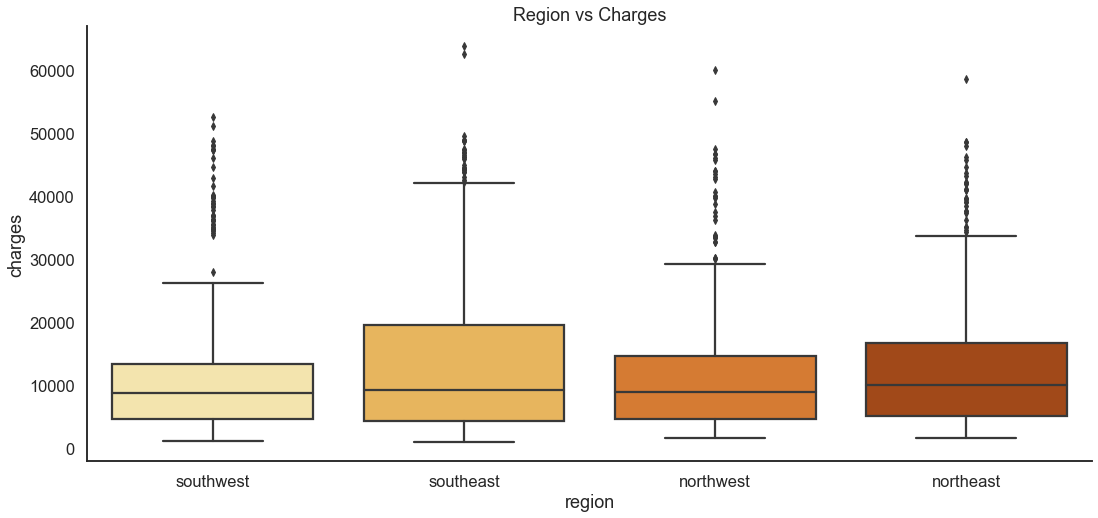

In [22]:
plt.figure(figsize = (18, 8))
sns.boxplot(x = 'region', y = 'charges', data = data, palette ='YlOrBr')
plt.title('Region vs Charges')
sns.despine()

From this plot we can see that members in the Southeast region have relatively higher charges than others, but overall the effect does not seem dramatic. 

Finally, we will display the correlation plot or heatmap for the dataset. Seaborn offers a convenient way to plot rectangular data as a color-encoded matrix. However, in order to get the full picture of our dataset, we first need to convert a couple of the categorical variables to numeric variables: sex and smoker. 

In [39]:
data['male']=data['sex'].replace('female', 0,inplace=False)
data['male']=data['sex'].replace('male', 1,inplace=False)
data['smoker'].replace('no', 0,inplace=True)
data['smoker'].replace('yes', 1,inplace=True)
data2 = data.copy()
data2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'male'], dtype='object')

In [41]:
data2.drop(['sex'], axis=1, inplace = True)
data2.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges', 'male'], dtype='object')

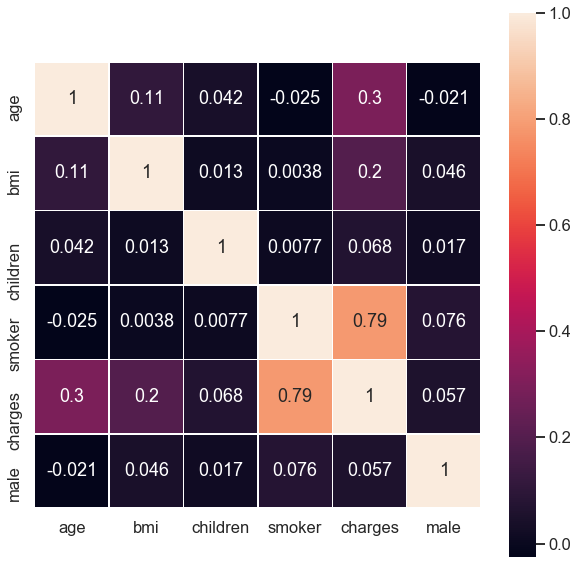

In [42]:
f, ax = plt.subplots(figsize = (10, 10))
corr = data2.corr()
ax.set_ylim(-1.5,2.5)
sns.heatmap(corr, linewidths=.5, annot=True, square = True, ax = ax)

In conclusion, based on our EDA and reiterated through our final correlation plot, it appears that smoking is the most correlated with charges among these variables. It is followed by age, BMI, number of children and then sex.

Sources
1. https://seaborn.pydata.org/generated/seaborn.pairplot.html 
2. https://en.wikipedia.org/wiki/Kernel_density_estimation
3. https://en.wikipedia.org/wiki/Violin_plot